#  **Network Intrusion Detection Using Logistic Regression on the UNSW-NB15** 



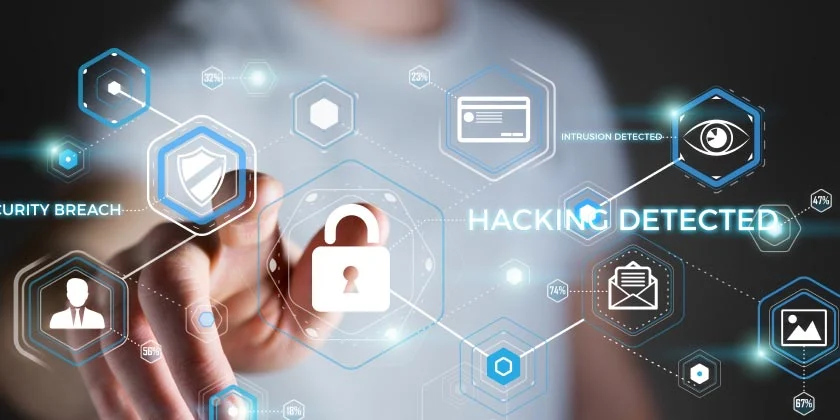

#### **Name:KRISHNAKRIPA VM**

#### **Organization:Entri Elevate**

#### **Date:25-09-2024**

## 1.Overview of Problem Statement:
`Cybersecurity is a crucial aspect in today’s digital landscape, where preventing and identifying attacks is of paramount importance. The given dataset contains information about network traffic, and the goal is to build a machine learning model to predict whether a given traffic event is an attack or normal behavior based on its features.`

## 2.Objective:
`To develop a predictive model using machine learning algorithms to classify network traffic events as either normal or malicious (attack).`

## 3.Data Description:

 ⚫`Source: UNSW Cybersecurity dataset : https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/`

 ⚫`Datast: https://data.world/victorpuli/useful-unsw-nb15-data`

 ⚫`Features:`

▶ id                
▶ dur                
▶ spkts                
▶ dpkts           
▶ sbytes               
▶ dbytes               
▶ rate               
▶ sttl               
▶ dttl                
▶ sload              
▶ dload             
▶ sloss             
▶ dloss            
▶ sinpkt         
▶ dinpkt            
▶ sjit               
▶ djit              
▶ swin                
▶ stcpb               
▶ dtcpb               
▶ dwin                 
▶ tcprtt            
▶ synack            
▶ ackdat             
▶ smean              
▶ dmean             
▶ trans_depth        
▶ response_body_len 
          
▶ ct_srv_src        
▶ ct_state_ttl      
▶ ct_dst_ltm         
▶ ct_src_dport_ltm   
▶ ct_dst_sport_ltm  
▶ ct_dst_src_ltm     
▶ is_ftp_login     
▶ t_ftp_cmd        
▶ ct_flw_http_mthd   
▶ ct_src_ltm        
▶ ct_srv_dst         
▶ is_sm_ips_ports    
▶ attack_cat        
▶ label              

## **`4.Data Collection:`**
`Data has been provided and imported. Next, we gained insights into the data distribution and patterns through initial checks and will continue with further analysis.`

#### ↦ **`IMPORTING LIBRARIES`**

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Sklearn modules for preprocessing, modeling, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#### ↦ **`LOADING DATASET`**

In [2]:
file_path = os.path.join(r"C:\Users\DELL\Downloads\PROJECT CAPSTONE", "unsw-nb15-data (1).csv")
df = pd.read_csv(file_path)

  #### ↦ **`- Gain insights into the data distribution, relationships, and potential patterns.`**

In [3]:
# Display the first few rows of the dataset
df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
# Check the shape and info of the dataset
print("Shape of dataset:", df.shape,"\n\n")
print(df.info())

Shape of dataset: (192111, 42) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192111 entries, 0 to 192110
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 192111 non-null  int64  
 1   dur                192111 non-null  float64
 2   spkts              192111 non-null  int64  
 3   dpkts              192111 non-null  int64  
 4   sbytes             192111 non-null  int64  
 5   dbytes             192111 non-null  int64  
 6   rate               192111 non-null  float64
 7   sttl               192111 non-null  int64  
 8   dttl               192111 non-null  int64  
 9   sload              192111 non-null  float64
 10  dload              192111 non-null  float64
 11  sloss              192111 non-null  int64  
 12  dloss              192111 non-null  int64  
 13  sinpkt             192111 non-null  float64
 14  dinpkt             192111 non-null  float64
 15  sjit             

In [5]:
# Check for missing values
print("Missing values in dataset:\n ---------------------\n", df.isnull().sum())


Missing values in dataset:
 ---------------------
 id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label 

In [6]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,192111.0,6.065787e+04,3.971848e+04,1.0,29876.500000,5.614600e+04,8.457450e+04,1.753060e+05
dur,192111.0,1.602667e+00,6.703883e+00,0.0,0.000010,1.995150e-01,9.132610e-01,5.999999e+01
spkts,192111.0,2.551681e+01,1.565880e+02,1.0,2.000000,1.000000e+01,1.600000e+01,1.064600e+04
dpkts,192111.0,2.434765e+01,1.270754e+02,0.0,0.000000,6.000000e+00,1.800000e+01,1.101800e+04
sbytes,192111.0,1.132552e+04,2.006541e+05,24.0,200.000000,8.100000e+02,2.030000e+03,1.435577e+07
dbytes,192111.0,1.881427e+04,1.661692e+05,0.0,0.000000,3.540000e+02,1.810000e+03,1.465753e+07
rate,192111.0,5.342716e+04,1.308078e+05,0.0,25.109535,1.207300e+02,4.545455e+04,1.000000e+06
sttl,192111.0,1.559025e+02,1.076355e+02,0.0,31.000000,2.540000e+02,2.540000e+02,2.550000e+02
dttl,192111.0,1.099007e+02,1.169012e+02,0.0,0.000000,2.900000e+01,2.520000e+02,2.540000e+02
sload,192111.0,6.033506e+07,2.035735e+08,0.0,8682.945312,1.441702e+05,3.120000e+07,5.988000e+09


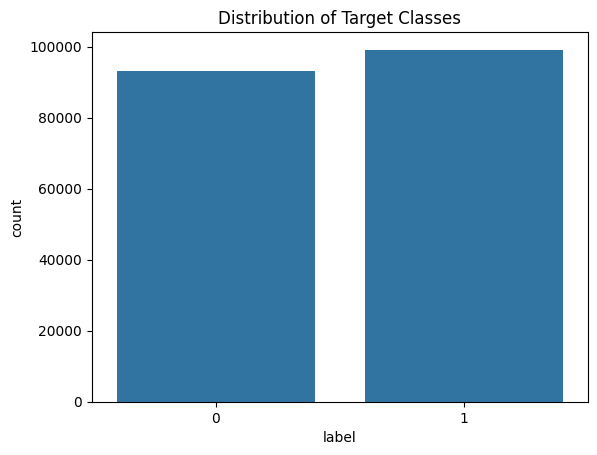

In [7]:
# Distribution of target classes

sns.countplot(x='label', data=df)
plt.title('Distribution of Target Classes')
plt.show()

#### ↦ **`1. Data Distribution for Individual Features`**
##### **A quick look at the distributions of individual features can reveal skewness, outliers, and other patterns.**

In [8]:
# Plotting histograms for a subset of numeric features to see their distributions

numeric_features=df.select_dtypes(include=['float64', 'int64']).columns
numeric_features

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

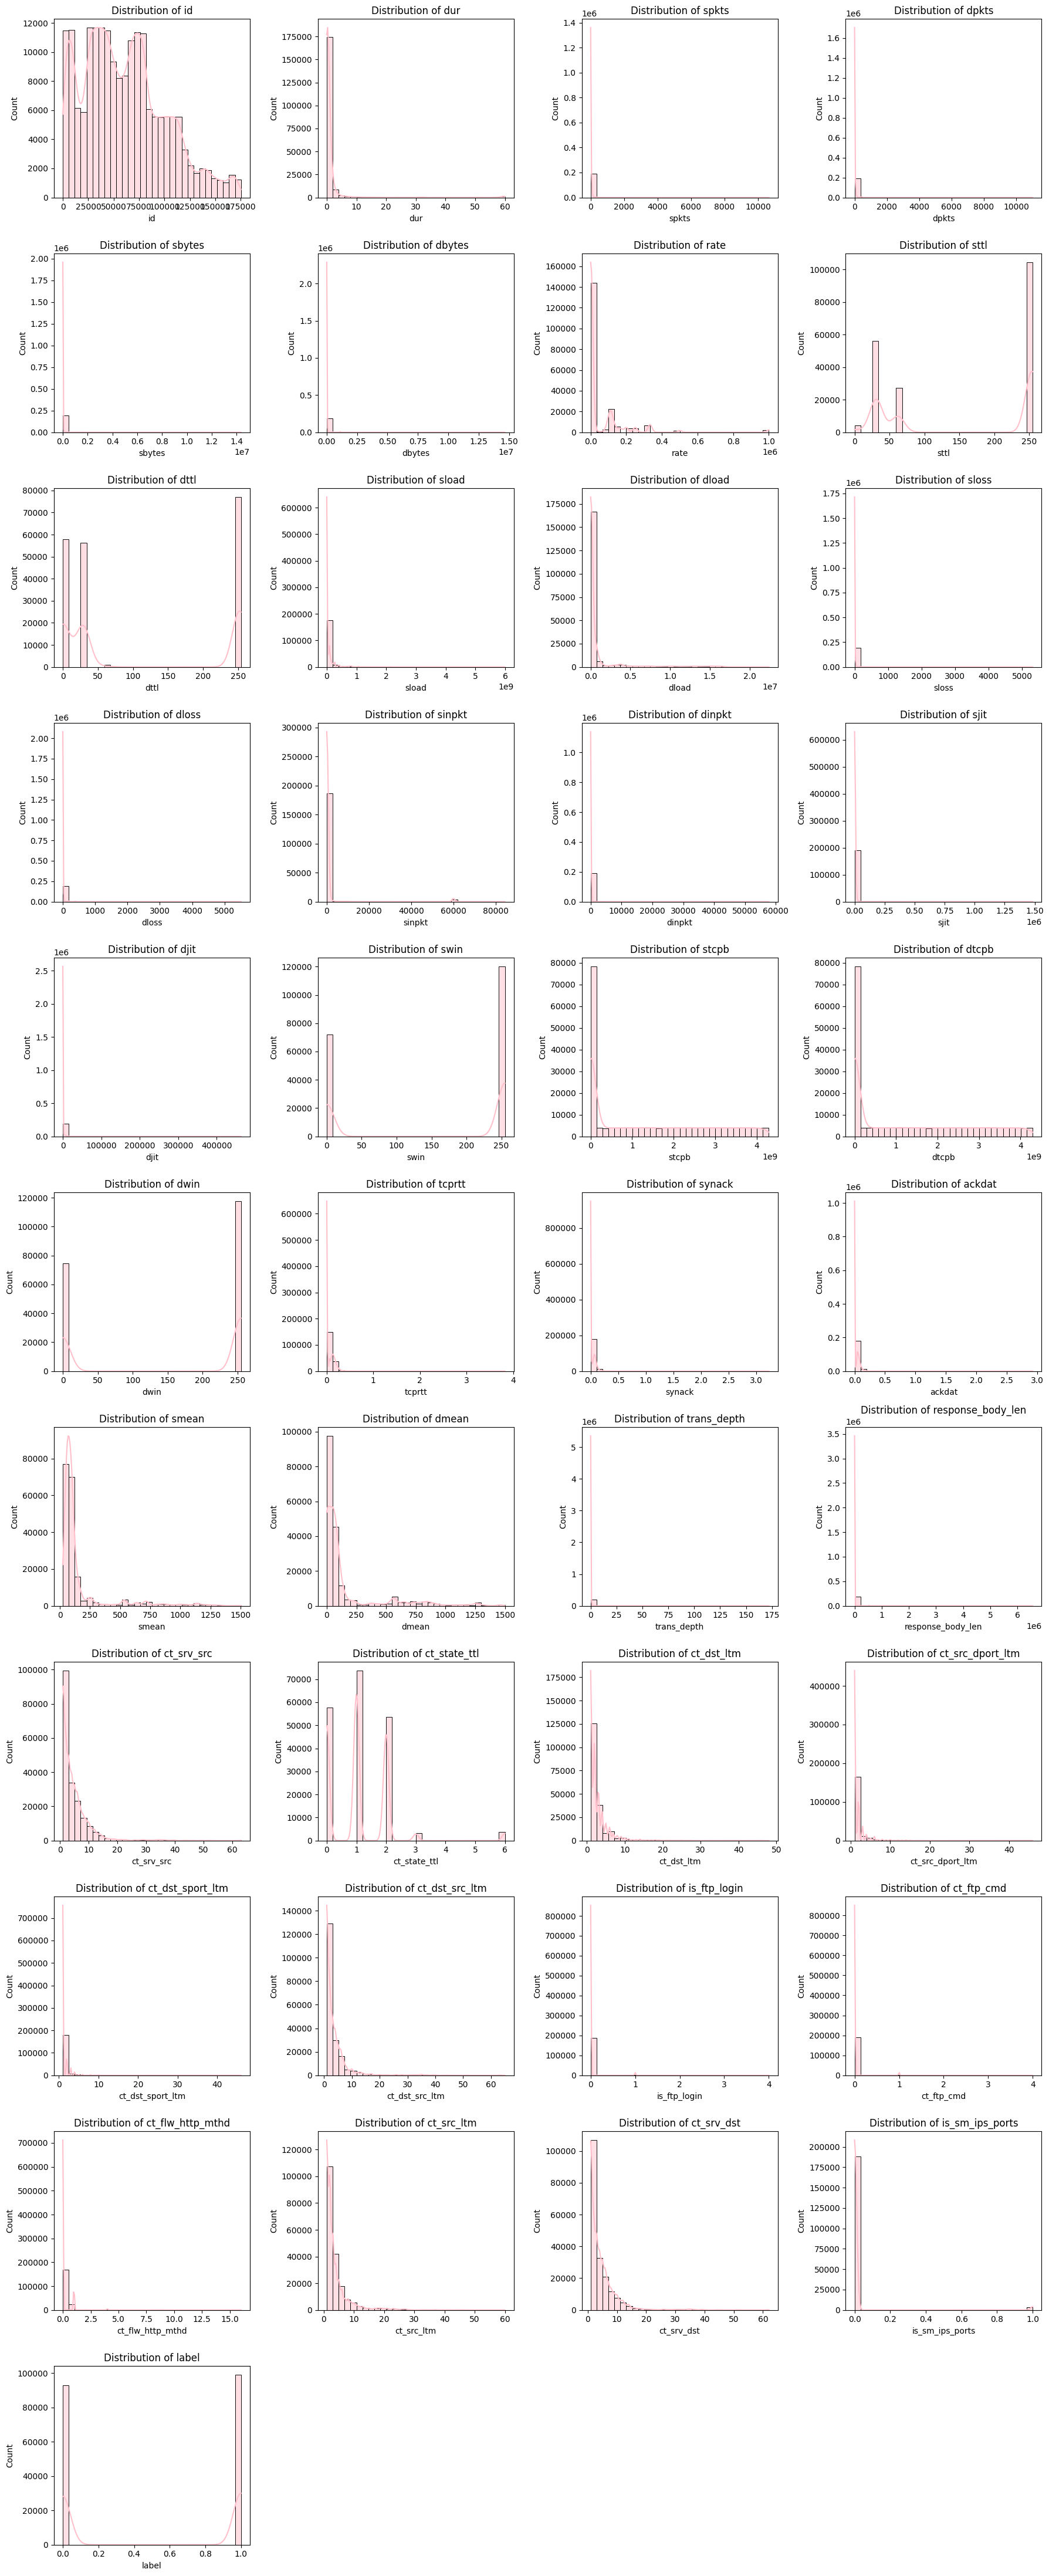

In [9]:

import math

# Number of features to plot
num_features = len(numeric_features)
# Calculate the grid layout
num_cols = 4  # Set the number of columns you want
num_rows = math.ceil(num_features / num_cols)

plt.figure(figsize=(18, num_rows * 4))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], kde=True, bins=30,color='pink')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


 ### **`2.Box Plots to Identify Outliers`**

##### Box plots help identify outliers by showing the spread of values for each feature.

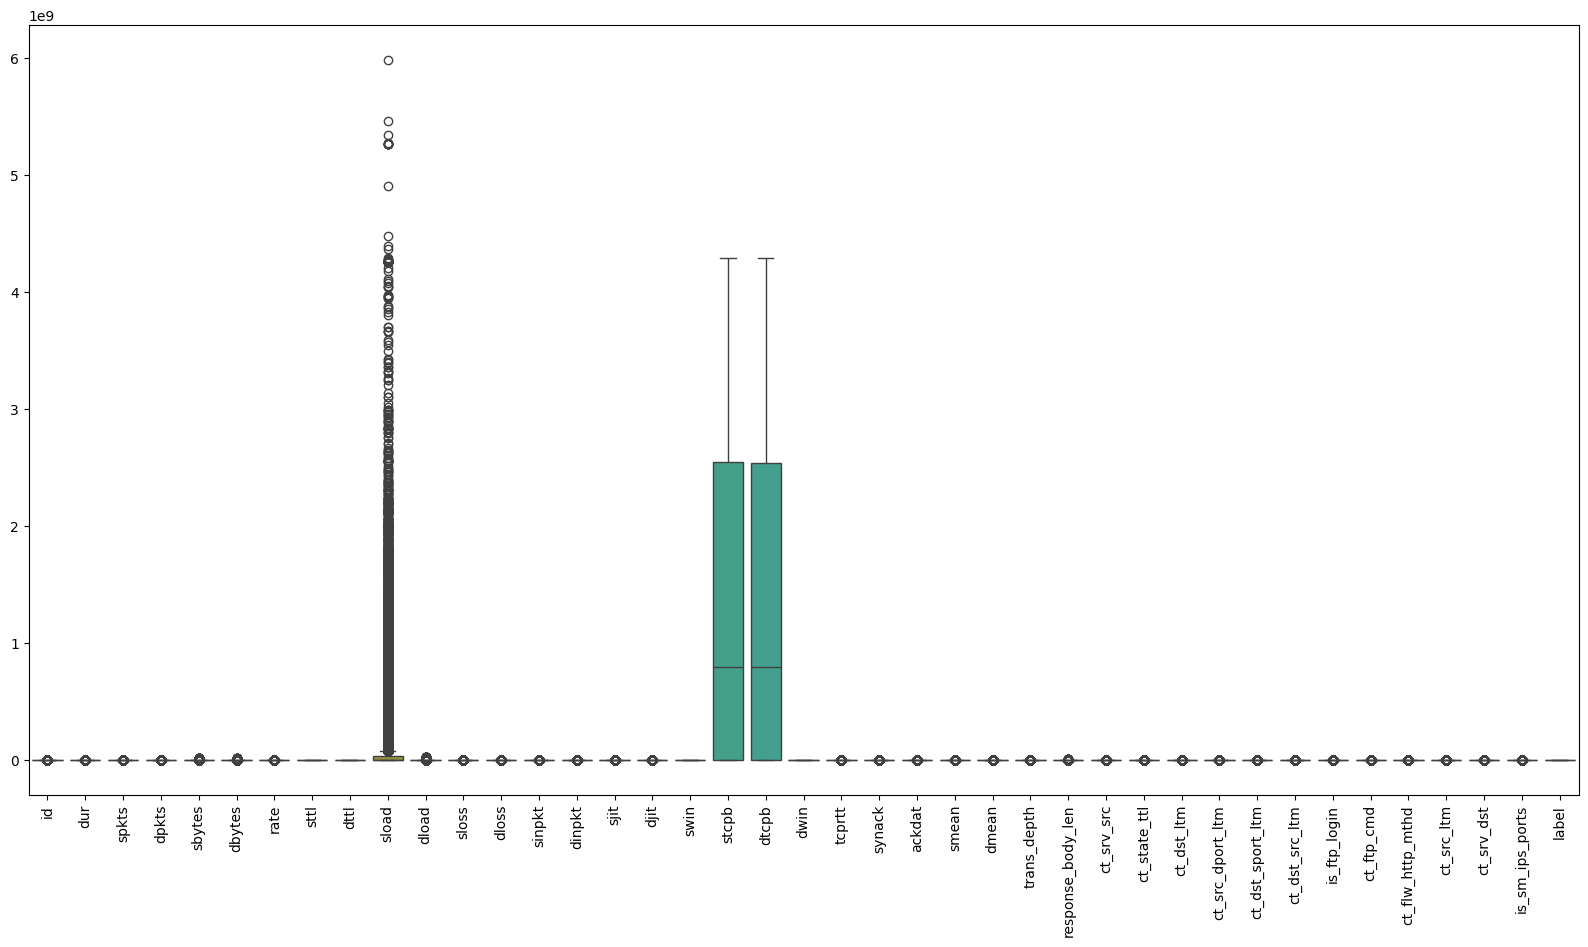

In [10]:
#checking for outliers by ploting the boxplots

plt.figure(figsize = (20,10))
sns.boxplot(data = df.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

### **`3. Scatter Plot Matrix for Pairwise Relationships`**

##### A scatter plot matrix provides a comprehensive view of pairwise relationships across multiple features. For larger datasets, and want to select only a few key features.

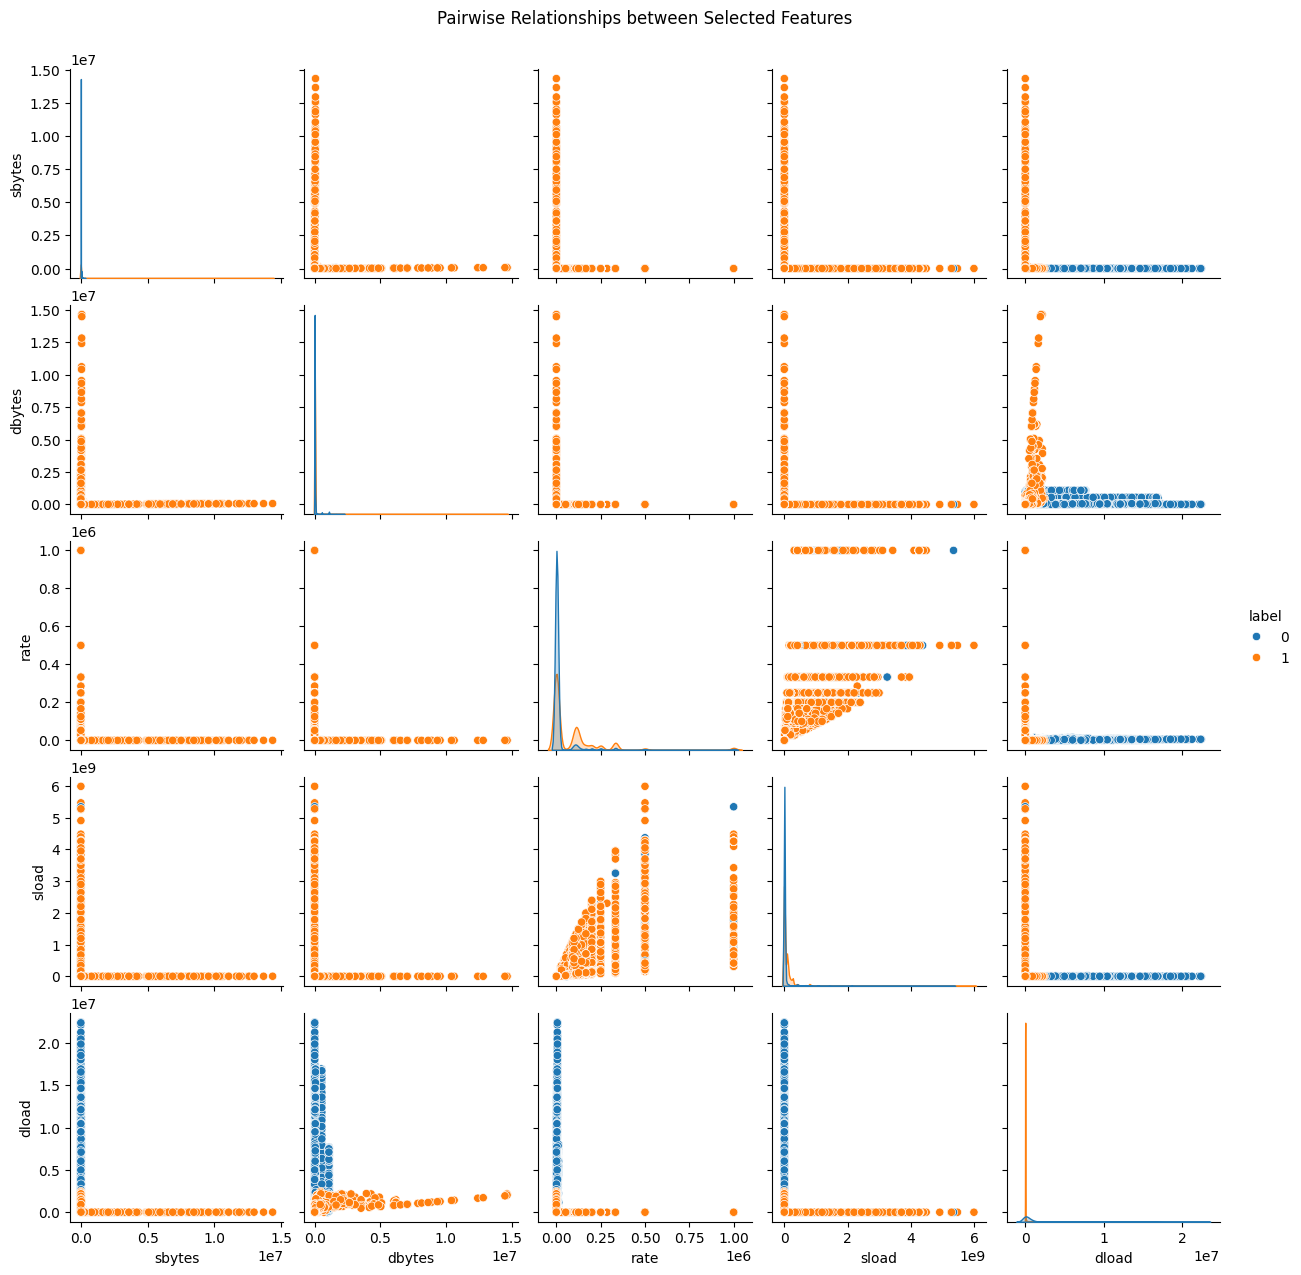

In [11]:
# Pairplot for selected features to view pairwise relationships
sns.pairplot(df[['sbytes', 'dbytes', 'rate', 'sload', 'dload', 'label']], hue='label', diag_kind='kde')
plt.suptitle('Pairwise Relationships between Selected Features', y=1.02)
plt.show()


### **`4. Distribution of Categorical Variables`**

##### Visualize the distribution of categorical feature attack_cat

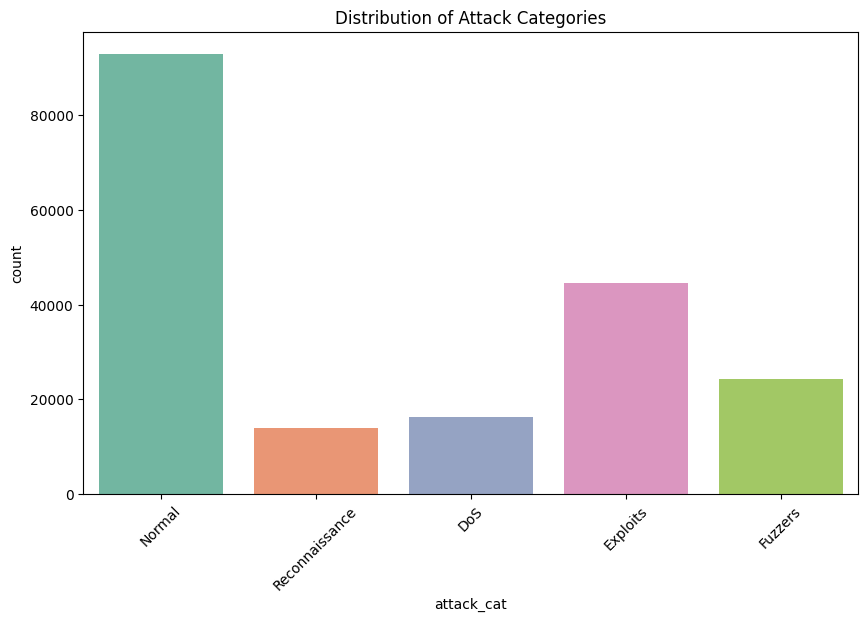

In [12]:
# Count plot for categorical variable 'attack_cat' with updated syntax
plt.figure(figsize=(10, 6))
sns.countplot(x='attack_cat', data=df, hue='attack_cat', palette='Set2', dodge=False, legend=False)
plt.title('Distribution of Attack Categories')
plt.xticks(rotation=45)
plt.show()




### **` Violin Plot Grouped by Target Label`**
##### Visualize a feature’s distribution varies with the target class using violin plots.

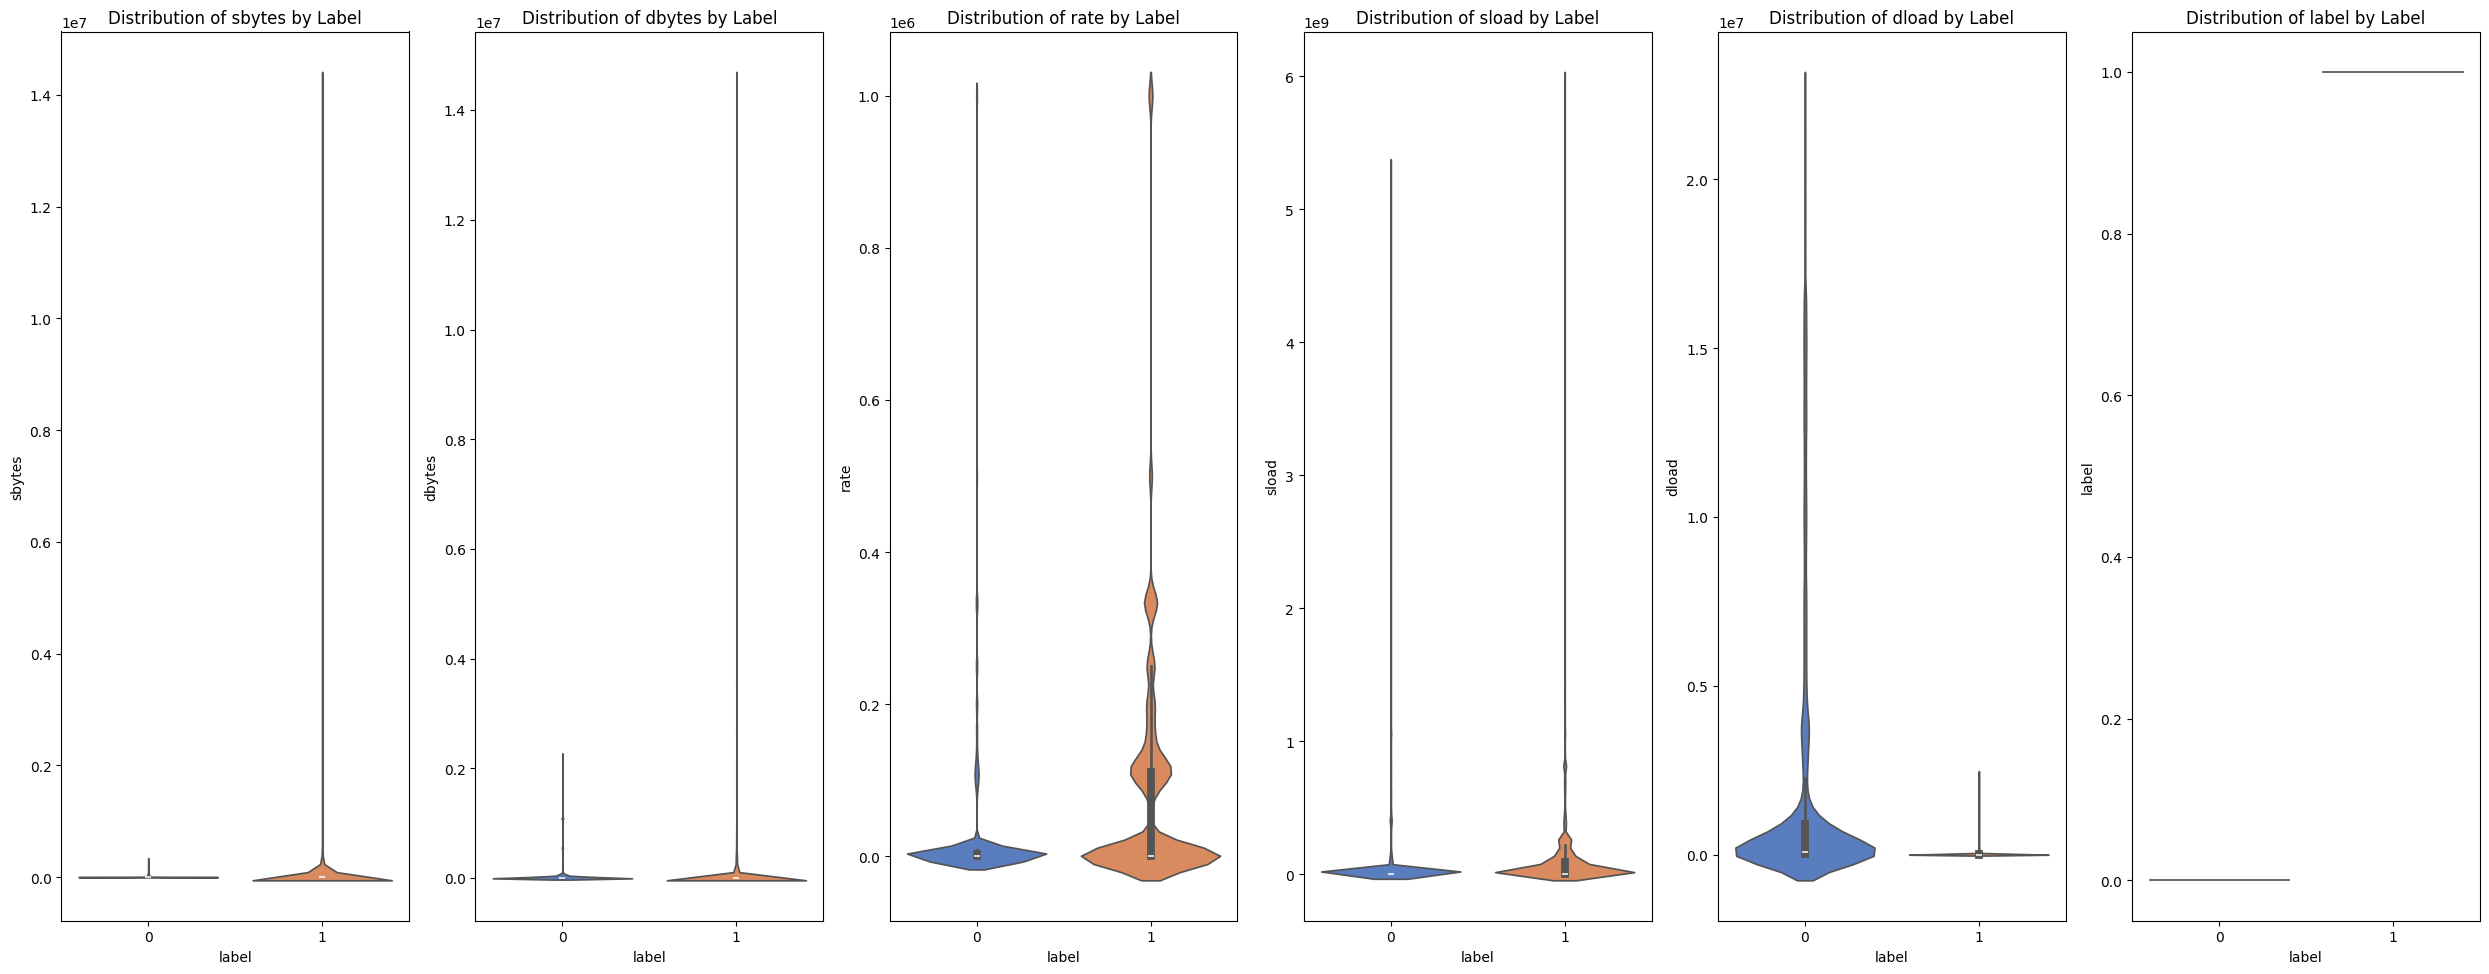

In [13]:
# Set up the plotting area
plt.figure(figsize=(25, 10))
features=['sbytes', 'dbytes', 'rate', 'sload', 'dload', 'label']
# Loop through each feature and create a violin plot
for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)  # Adjust to (nrows, ncols) if needed
    sns.violinplot(x='label', y=feature, data=df, hue='label', palette='muted', dodge=False, legend=False)
    plt.title(f'Distribution of {feature} by Label')

plt.tight_layout()
plt.show()

## **`5.Data Preprocessing`**

###  **`1.Handling Outliers`**

In [14]:
def count_outliers_iqr(DF):
    outlier_count = 0  # Initialize counter for total outliers

    for col in DF.columns:
        if DF[col].dtype != 'object':  # Only check numeric columns
            Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Identify outliers
            outliers = DF[(df[col] < lower_bound) | (DF[col] > upper_bound)]
            num_outliers = outliers.shape[0]
            outlier_count += num_outliers
            
            print(f"Feature: {col} | Outliers: {num_outliers}")
    
    return outlier_count

# Exclude the target column 'Class' while checking for outliers
total_outliers = count_outliers_iqr(df.drop(columns=['attack_cat']))

print(f"\nTotal number of outliers in the dataset: {total_outliers}")

Feature: id | Outliers: 1976
Feature: dur | Outliers: 15304
Feature: spkts | Outliers: 28249
Feature: dpkts | Outliers: 19576
Feature: sbytes | Outliers: 21903
Feature: dbytes | Outliers: 31130
Feature: rate | Outliers: 28839
Feature: sttl | Outliers: 0
Feature: dttl | Outliers: 0
Feature: sload | Outliers: 40533
Feature: dload | Outliers: 42907
Feature: sloss | Outliers: 14577
Feature: dloss | Outliers: 23234
Feature: sinpkt | Outliers: 14374
Feature: dinpkt | Outliers: 9120
Feature: sjit | Outliers: 10984
Feature: djit | Outliers: 23961
Feature: swin | Outliers: 0
Feature: stcpb | Outliers: 0
Feature: dtcpb | Outliers: 0
Feature: dwin | Outliers: 0
Feature: tcprtt | Outliers: 2683
Feature: synack | Outliers: 4029
Feature: ackdat | Outliers: 3969
Feature: smean | Outliers: 27126
Feature: dmean | Outliers: 30157
Feature: trans_depth | Outliers: 24208
Feature: response_body_len | Outliers: 15936
Feature: ct_srv_src | Outliers: 10668
Feature: ct_state_ttl | Outliers: 3654
Feature: ct_dst

In [15]:
#capping outliers
def cap_outliers_iqr(df):
    df_capped = df.copy()  # Create a copy of the dataframe
    
    for col in df.columns:
        if df[col].dtype != 'object':  # Only cap numeric columns
            Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
            Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
            IQR = Q3 - Q1  # Interquartile range
            
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Cap values below the lower bound to the lower bound
            df_capped[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            
            # Cap values above the upper bound to the upper bound
            df_capped[col] = np.where(df[col] > upper_bound, upper_bound, df_capped[col])
    
    return df_capped


capped_df = cap_outliers_iqr(df.drop(columns='attack_cat'))

# Now 'capped_data' contains the data with outliers capped.

In [16]:
capped_df.shape

(192111, 41)

### **`Addressing skewness`**

In [17]:
# Assuming 'Data' is your dataframe and 'numerical_cols' is your list of numerical columns
def log_transform(data, columns):
    for col in columns:
        if data[col].skew() > 1 or data[col].skew() < -1:
            data[col] = np.log1p(data[col])
    return data

numerical_cols = capped_df.select_dtypes(include=['float64', 'int64']).columns
skew_capped_df = log_transform(df, numerical_cols)
skew_capped_df

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,1.098612,0.000000,6.208590,0.000000,11.417626,254,0,19.010486,...,0.693147,1.098612,0.0,0.0,0.0,0.693147,1.098612,0.0,Normal,0
1,2,0.000008,1.098612,0.000000,7.474772,0.000000,11.736077,254,0,20.596568,...,0.693147,1.098612,0.0,0.0,0.0,0.693147,1.098612,0.0,Normal,0
2,3,0.000005,1.098612,0.000000,6.974479,0.000000,12.206078,254,0,20.565910,...,0.693147,1.386294,0.0,0.0,0.0,0.693147,1.386294,0.0,Normal,0
3,4,0.000006,1.098612,0.000000,6.803505,0.000000,12.023757,254,0,20.212440,...,0.693147,1.386294,0.0,0.0,0.0,1.098612,1.386294,0.0,Normal,0
4,5,0.000010,1.098612,0.000000,7.662468,0.000000,11.512935,254,0,20.561217,...,0.693147,1.386294,0.0,0.0,0.0,1.098612,1.386294,0.0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192106,175249,1.103199,5.424950,3.931826,12.513818,8.034307,4.924048,62,252,13.888807,...,0.693147,0.693147,0.0,0.0,0.0,2.944439,0.693147,0.0,DoS,1
192107,175268,1.069633,4.317488,3.433987,11.156222,7.665285,4.003787,62,252,12.572703,...,0.693147,0.693147,0.0,0.0,0.0,2.944439,0.693147,0.0,Exploits,1
192108,175278,1.551620,4.204693,5.831882,8.034955,12.963330,4.699544,62,252,8.785723,...,0.693147,0.693147,0.0,0.0,0.0,1.098612,0.693147,0.0,Exploits,1
192109,175300,0.691397,3.044522,3.433987,6.849066,9.722265,3.915456,62,252,8.879908,...,0.693147,0.693147,0.0,0.0,0.0,2.079442,0.693147,0.0,Exploits,1


In [66]:
skew_capped_df.shape

(192111, 42)

In [67]:
skew_capped_df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,...,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000,192111.000000
mean,60657.865968,0.437330,2.320937,1.849697,6.767630,5.099326,6.428703,155.902473,109.900714,12.476286,...,0.907751,0.800108,1.288160,0.011806,0.011825,0.095180,1.305767,1.452002,0.013270,0.515905
std,39718.477061,0.681772,1.148054,1.510411,1.618409,3.738853,3.851179,107.635492,116.901171,4.481673,...,0.390925,0.271808,0.626959,0.090497,0.090647,0.266658,0.615477,0.669473,0.094986,0.499748
min,1.000000,0.000000,0.693147,0.000000,3.218876,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000
25%,29876.500000,0.000010,1.098612,0.000000,5.303305,0.000000,3.262301,31.000000,0.000000,9.069231,...,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000
50%,56146.000000,0.181917,2.397895,1.945910,6.698268,5.872118,4.801806,254.000000,29.000000,11.878757,...,0.693147,0.693147,1.098612,0.000000,0.000000,0.000000,1.098612,1.386294,0.000000,1.000000
75%,84574.500000,0.648809,2.833213,2.944439,7.616284,7.501634,10.724490,254.000000,252.000000,17.255929,...,1.098612,0.693147,1.609438,0.000000,0.000000,0.000000,1.609438,1.945910,0.000000,1.000000
max,175306.000000,4.110874,9.273033,9.307376,16.479663,16.500465,13.815512,255.000000,254.000000,22.513023,...,3.850148,3.850148,4.189655,1.609438,1.609438,2.833213,4.110874,4.143135,0.693147,1.000000


## **6.Exploratory Data Analysis (EDA):**

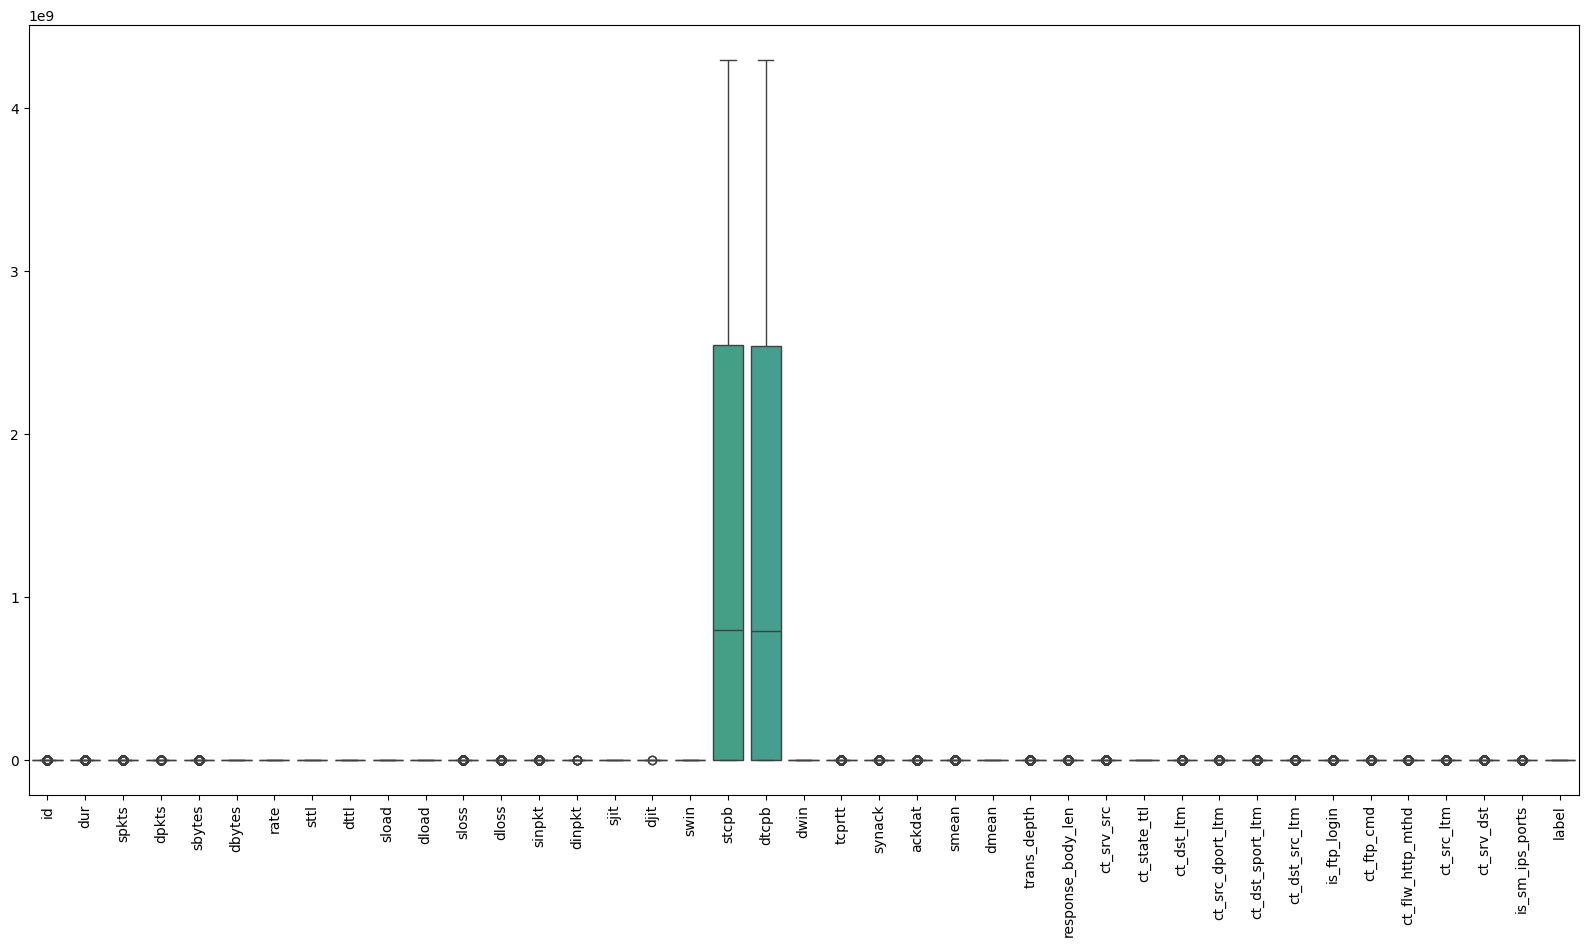

In [68]:
#Now, checking for outliers by ploting the boxplots
plt.figure(figsize = (20,10))
sns.boxplot(data =skew_capped_df.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

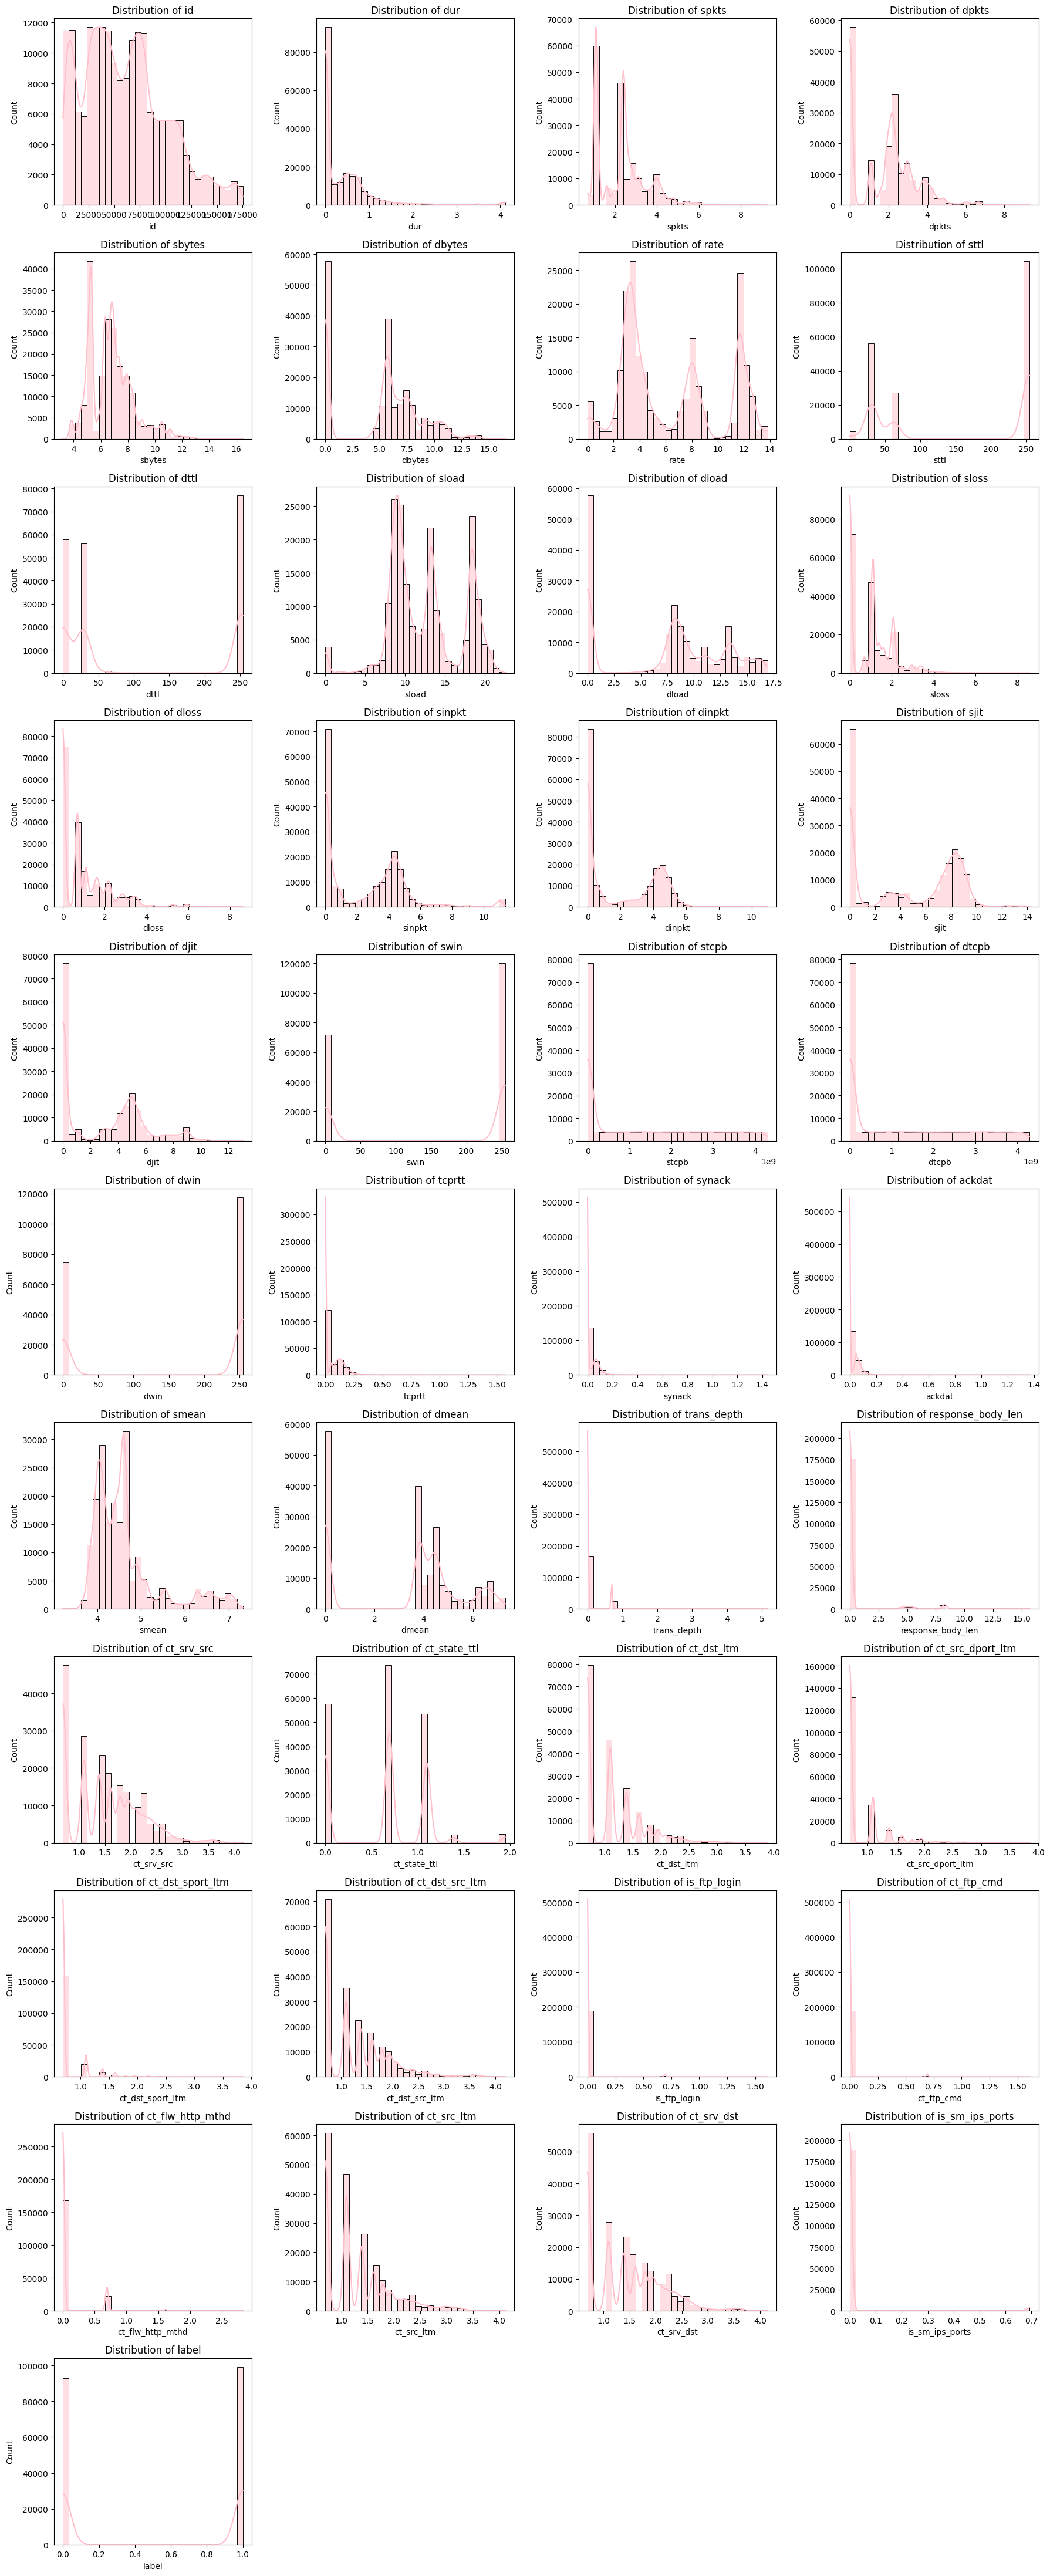

In [69]:
# Number of features to plot
num_features = len(numeric_features)
# Calculate the grid layout
num_cols = 4  # Set the number of columns you want
num_rows = math.ceil(num_features / num_cols)

plt.figure(figsize=(18, num_rows * 4))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(skew_capped_df[feature], kde=True, bins=30,color='pink')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [70]:
skew_capped_df.shape

(192111, 42)


## **`7.Feature Engineering`:Label Encoding**


In [71]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
cat_column = 'attack_cat'  # Replace with your actual column name

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column
skew_capped_df[cat_column] = label_encoder.fit_transform(skew_capped_df[cat_column])

# Display the first few rows to verify
skew_capped_df.head(10)

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,1.098612,0.0,6.208590,0.0,11.417626,254,0,19.010486,...,0.693147,1.098612,0.0,0.0,0.0,0.693147,1.098612,0.000000,3,0
1,2,0.000008,1.098612,0.0,7.474772,0.0,11.736077,254,0,20.596568,...,0.693147,1.098612,0.0,0.0,0.0,0.693147,1.098612,0.000000,3,0
2,3,0.000005,1.098612,0.0,6.974479,0.0,12.206078,254,0,20.565910,...,0.693147,1.386294,0.0,0.0,0.0,0.693147,1.386294,0.000000,3,0
3,4,0.000006,1.098612,0.0,6.803505,0.0,12.023757,254,0,20.212440,...,0.693147,1.386294,0.0,0.0,0.0,1.098612,1.386294,0.000000,3,0
4,5,0.000010,1.098612,0.0,7.662468,0.0,11.512935,254,0,20.561217,...,0.693147,1.386294,0.0,0.0,0.0,1.098612,1.386294,0.000000,3,0
5,6,0.000003,1.098612,0.0,6.665684,0.0,12.716901,254,0,20.767602,...,0.693147,1.098612,0.0,0.0,0.0,1.098612,1.098612,0.000000,3,0
6,7,0.000006,1.098612,0.0,7.581210,0.0,12.023757,254,0,20.990745,...,0.693147,1.098612,0.0,0.0,0.0,1.098612,1.098612,0.000000,3,0
7,8,0.000028,1.098612,0.0,7.233455,0.0,10.483334,254,0,19.102334,...,0.693147,1.386294,0.0,0.0,0.0,0.693147,1.386294,0.000000,3,0
8,9,0.000000,0.693147,0.0,3.850148,0.0,0.000000,0,0,0.000000,...,1.098612,1.098612,0.0,0.0,0.0,1.098612,1.098612,0.693147,3,0
9,10,0.000000,0.693147,0.0,3.850148,0.0,0.000000,0,0,0.000000,...,1.098612,1.098612,0.0,0.0,0.0,1.098612,1.098612,0.693147,3,0


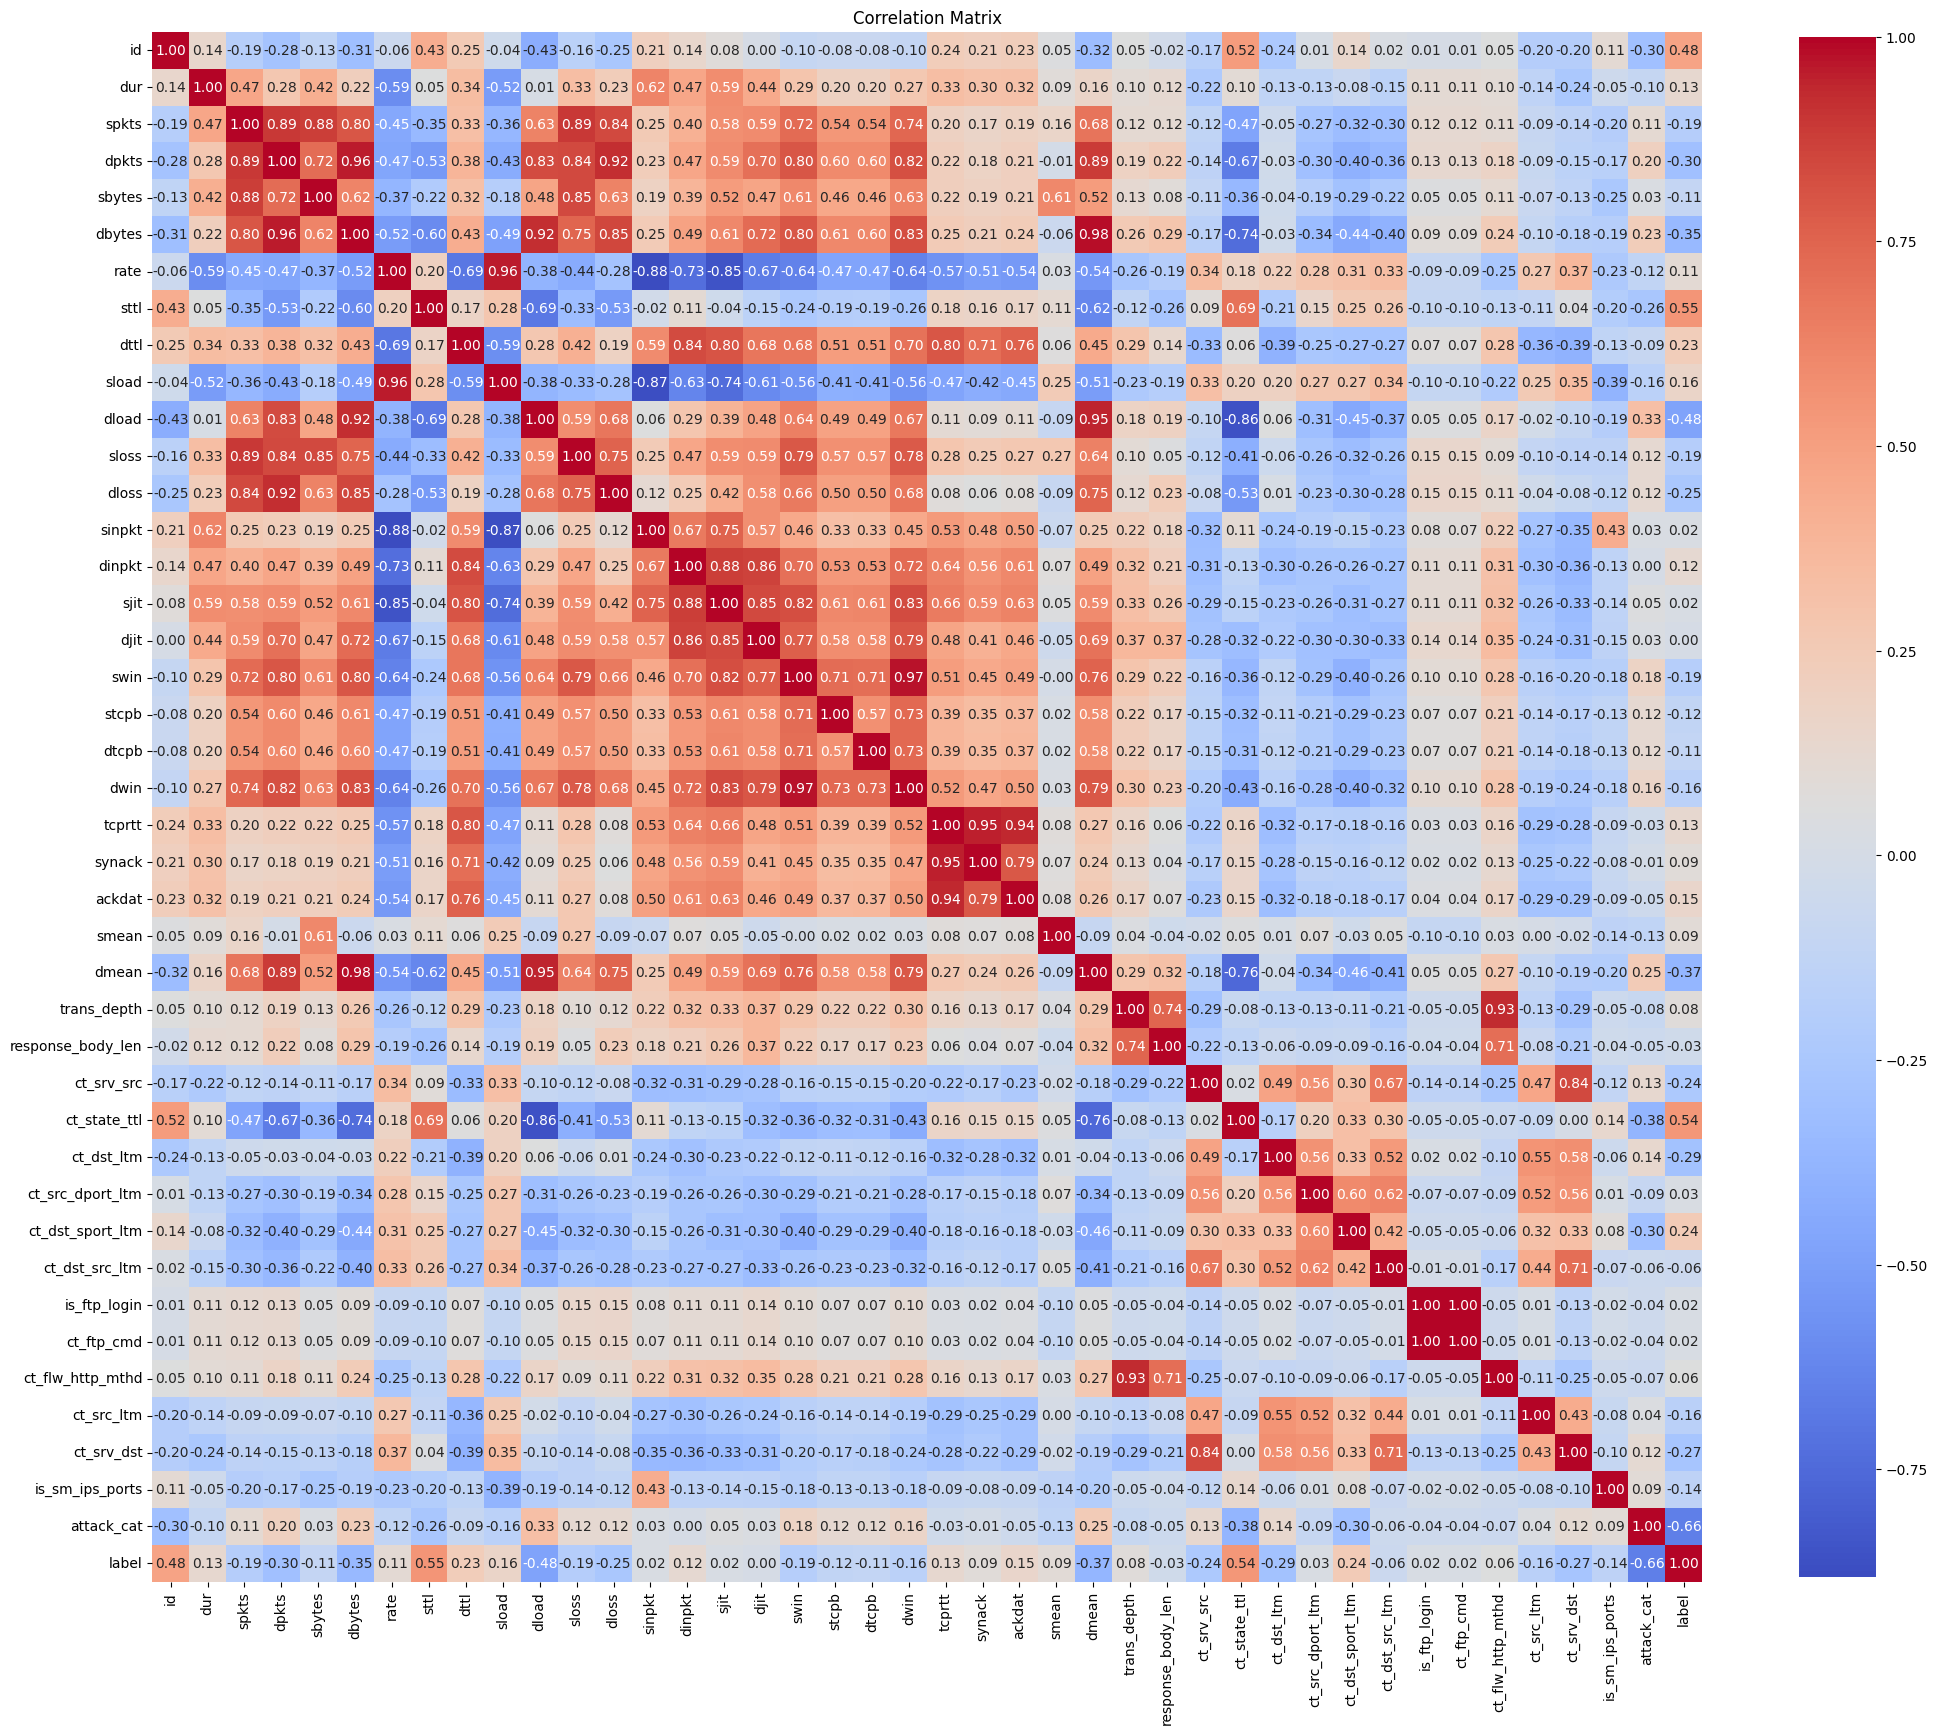

In [72]:
# Assuming skew_capped_df is your DataFrame with numeric columns
# Calculate the correlation matrix
numer_cols = skew_capped_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = skew_capped_df[numer_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()


## **`8.Feature Selection`**

In [73]:


# Find pairs of features with high correlation
threshold = 0.8
strong_corr_pairs = []

# Loop through the correlation matrix
for col in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix[col][row]) > threshold and col != row:
            strong_corr_pairs.append((col, row, corr_matrix[col][row]))

# Convert to DataFrame for easier readability
strong_corr_df = pd.DataFrame(strong_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
print(strong_corr_df)

           Feature 1     Feature 2  Correlation
0              spkts         dpkts     0.892632
1              spkts        sbytes     0.877996
2              spkts         sloss     0.891090
3              spkts         dloss     0.840719
4              dpkts         spkts     0.892632
..               ...           ...          ...
63      ct_state_ttl         dload    -0.858776
64      is_ftp_login    ct_ftp_cmd     0.999384
65        ct_ftp_cmd  is_ftp_login     0.999384
66  ct_flw_http_mthd   trans_depth     0.933439
67        ct_srv_dst    ct_srv_src     0.842440

[68 rows x 3 columns]


In [74]:
# Identify multicollinearity using VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X = skew_capped_df.select_dtypes(include=[np.number])  # Select numeric features
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Filter features with VIF > 5 (or other suitable threshold)
high_vif_features = vif_data[vif_data["VIF"] > 5]
print(high_vif_features)

             Feature           VIF
2              spkts   1546.695101
3              dpkts   1805.807331
4             sbytes   2864.919329
5             dbytes  10278.958281
6               rate    477.478022
7               sttl      5.804705
8               dttl     27.783033
9              sload    397.210053
10             dload     68.497604
11             sloss     11.970507
12             dloss     29.506561
13            sinpkt     18.595226
14            dinpkt     24.200888
15              sjit     33.357847
16              djit     14.282229
17              swin     49.307437
20              dwin     64.515741
21            tcprtt    572.312238
22            synack    165.489212
23            ackdat    130.025556
24             smean    571.644382
25             dmean   4102.683569
26       trans_depth      9.493027
29      ct_state_ttl     24.534067
34      is_ftp_login    811.923286
35        ct_ftp_cmd    811.832501
36  ct_flw_http_mthd      8.194315
39   is_sm_ips_ports

In [75]:
# Removing one feature from each highly correlated pair
features_to_remove = set()

for feature1, feature2, _ in strong_corr_pairs:
    if feature1 not in features_to_remove and feature2 not in features_to_remove:
        # Decide to keep feature1, remove feature2
        features_to_remove.add(feature2)

# Drop the identified features from the DataFrame
df_reduced = df.drop(columns=features_to_remove)
print("Removed features:", features_to_remove)


Removed features: {'dwin', 'synack', 'dmean', 'sjit', 'ct_flw_http_mthd', 'ct_srv_dst', 'ct_ftp_cmd', 'sload', 'sinpkt', 'dloss', 'sloss', 'dpkts', 'dload', 'dinpkt', 'ackdat', 'sbytes'}


In [76]:
# Feature Engineering (example: creating a new feature)
# Suppose 'featureA' and 'featureB' are highly correlated
if 'featureA' in df_reduced.columns and 'featureB' in df_reduced.columns:
    df_reduced['featureA_B'] = df_reduced['featureA'] + df_reduced['featureB']

# Check remaining features
print("Remaining features after feature selection:", df_reduced.columns)


Remaining features after feature selection: Index(['id', 'dur', 'spkts', 'dbytes', 'rate', 'sttl', 'dttl', 'djit', 'swin',
       'stcpb', 'dtcpb', 'tcprtt', 'smean', 'trans_depth', 'response_body_len',
       'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_src_ltm',
       'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [77]:
df_reduced.shape

(192111, 26)

In [78]:
# Step 2: Separate features and target variable
X = df_reduced.drop('label', axis=1)
y = df_reduced['label']

In [79]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

# Verify the resampling
print("Before SMOTE:")
print(y_train.value_counts())
print("After SMOTE:")
print(pd.Series(y_train_sampled).value_counts())

Before SMOTE:
label
1    79392
0    74296
Name: count, dtype: int64
After SMOTE:
label
0    79392
1    79392
Name: count, dtype: int64


In [82]:
# Step 5: Standardization
# Using StandardScaler for standardization
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train_sampled)
X_test_standardized = standard_scaler.transform(X_test)

# Step 6: Feature Selection using SelectKBest
# SelectKBest with ANOVA F-value
k_best_selector = SelectKBest(score_func=f_classif, k=10)  # Selecting top 10 features
X_train_kbest = k_best_selector.fit_transform(X_train_standardized, y_train_sampled)
X_test_kbest = k_best_selector.transform(X_test_standardized)

# Get selected feature names
selected_features = X.columns[k_best_selector.get_support()]
print("Selected features using SelectKBest:")
print(selected_features)


Selected features using SelectKBest:
Index(['id', 'spkts', 'dbytes', 'sttl', 'dttl', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_dst_sport_ltm', 'attack_cat'],
      dtype='object')


In [83]:
# Step 7: Feature Selection using Random Forest
# Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_normalized, y_train_sampled)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking using Random Forest:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")


Feature ranking using Random Forest:
1. feature attack_cat (0.5003957940005592)
2. feature ct_state_ttl (0.1098479213427384)
3. feature sttl (0.07690705343894808)
4. feature id (0.05774908279833715)
5. feature smean (0.04193814792580009)
6. feature dttl (0.04045455733470515)
7. feature ct_dst_src_ltm (0.032341459883082686)
8. feature rate (0.026141691703824924)
9. feature dbytes (0.025967653753657716)
10. feature ct_srv_src (0.021577350755560987)
11. feature tcprtt (0.017857407567977546)
12. feature dur (0.013074138647122528)
13. feature spkts (0.007200250727232336)
14. feature swin (0.00529048578022162)
15. feature ct_dst_ltm (0.004221351918840805)
16. feature djit (0.003967527618353636)
17. feature is_sm_ips_ports (0.0035256745510694383)
18. feature ct_dst_sport_ltm (0.002854378724563057)
19. feature ct_src_dport_ltm (0.0019731697132800924)
20. feature ct_src_ltm (0.001685578953758721)
21. feature dtcpb (0.0015594480392687998)
22. feature stcpb (0.0014829952059888908)
23. feature res

<Axes: title={'center': 'Feature Importance'}>

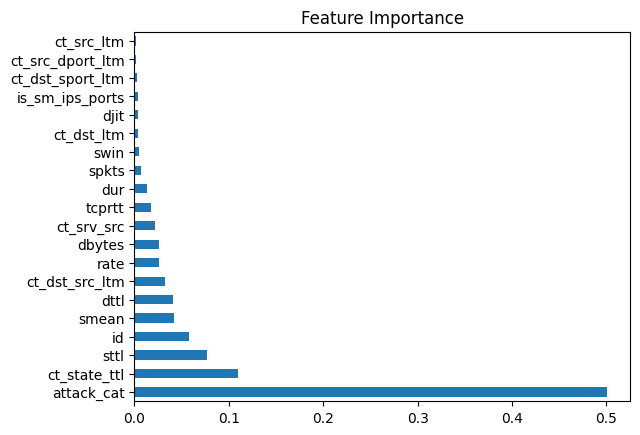

In [84]:
pd.Series(importances, index=X.columns).nlargest(20).plot(kind='barh', title='Feature Importance')

In [85]:
# Select top 10 features 
top_features = X_train_sampled.columns[rf_model.feature_importances_.argsort()[-10:]]
X_train = X_train_sampled[top_features]
X_test = X_test[top_features]

MODEL BUILDING

In [90]:
print(len(X_train), len(y_train))


153688 153688


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(len(X_train), len(y_train))


In [91]:
# Define a dictionary to store the best models and their scores
best_models = {}
best_params = {}

# Define hyperparameter grids for each model
param_grids = {
    'LogisticRegression': {
        'penalty': ['l2'],                # L2 regularization
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs']               # Only supports L2 with lbfgs
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']        # Only relevant for non-linear kernels
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1.0]
    }
}

In [ ]:
# Initialize models
models = {
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# Iterate over models and apply GridSearchCV
for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grids[model_name],
        cv=5, 
        scoring='accuracy', 
        n_jobs=-1
    )
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Store the best model and its parameters
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    
    # Predictions on the test set
    y_pred = best_models[model_name].predict(X_test)
    
    # Evaluate and display results
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Best Params: {best_params[model_name]}")
    print(f"{model_name} - Test Accuracy: {accuracy}")
    print(f"{model_name} - Classification Report:\n{classification_report(y_test, y_pred)}\n")
    

Training LogisticRegression...
LogisticRegression - Best Params: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression - Test Accuracy: 0.6840694375764516
LogisticRegression - Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.49      0.60     18704
           1       0.64      0.87      0.74     19719

    accuracy                           0.68     38423
   macro avg       0.71      0.68      0.67     38423
weighted avg       0.71      0.68      0.67     38423


Training SVM...
